In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.optimize as opt

## [van der Pol oscillator](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator)

The [van der Pol oscillator](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator) is a nonlinear autonomous ODE given by
$$
x'' - \mu(1-x^2) x' + x = 0
$$
where $x$ represents *position* and $\mu$ is the *damping* term.  The oscillations will build up tension, followed by a quick release (https://en.wikipedia.org/wiki/Relaxation_oscillator).

In [11]:
def f(t, y):
    mu = 10
    return np.array([y[1], mu*(1-y[0]**2)*y[1] - y[0]])

def Jf(t,y):
    mu = 10
    return np.array([[0,1], [-2*mu*y[0]*y[1]-1, mu*(1-y[0]**2)]])

In [12]:
print(np.linalg.eig(Jf(0,[1,0]))[0])

[0.+1.j 0.-1.j]


In [13]:
T = 100

nsteps = 1000
h = T/nsteps
y = np.zeros((2,nsteps))
y[:,0] = [1,0]

def g(yk, h, ykm1):
    return yk - h*f(0,yk) - ykm1

def dg(y, h, ykm1):
    mu = 10
    return np.array([[1,-1],[2*mu*y[0]*y[1]+1,-h*mu*(1-y[0]**2)]])
    
for k in range(1,nsteps):
    y[:,k] = y[:,k-1] + h * f(0,y[:,k-1])
    y[:,k] = opt.newton(g,       # function to find the root of
                        y[:,k],  # initial guess
                        dg,
                        args=(h, y[:,k-1]))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

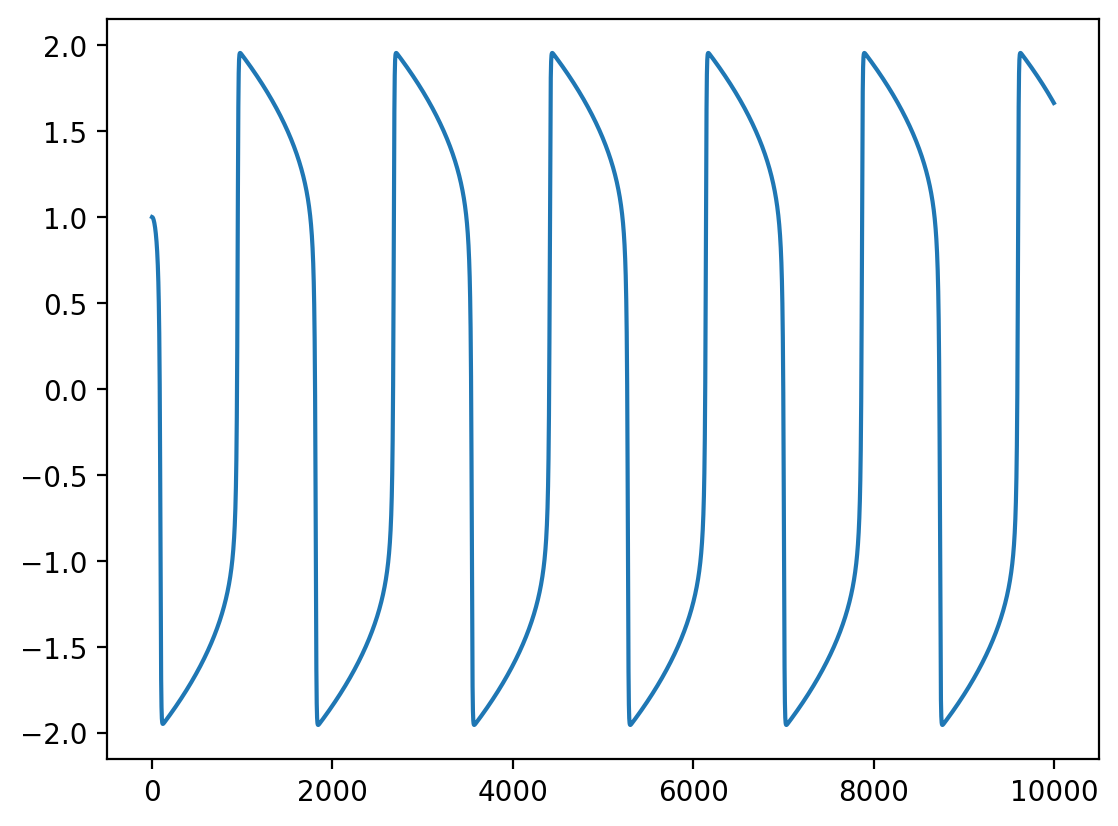

In [9]:
plt.plot(y[0,:])

In [14]:
s = scipy.integrate.solve_ivp(f, t_span=[0.0, 100],
                              method='BDF',
                              y0=[1.0, 0.0])

In [15]:
print(len(s.t))

930


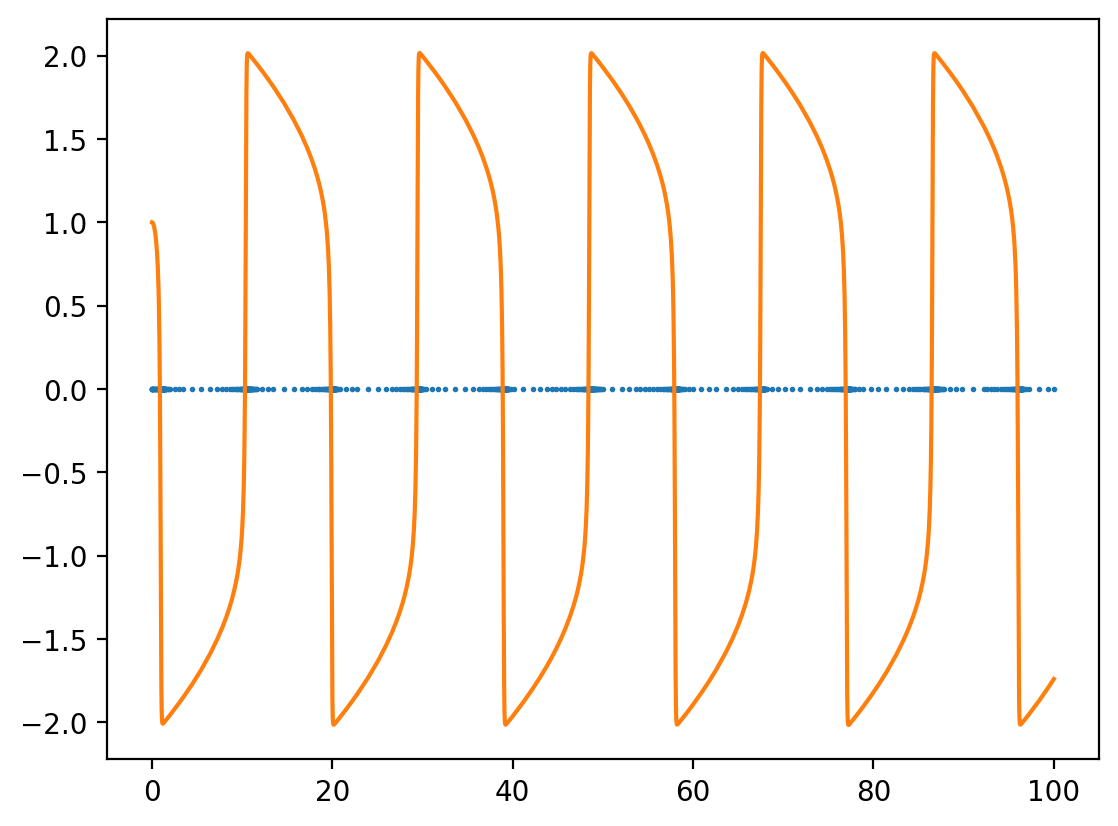

In [16]:
plt.plot(s.t, 0*s.y[0], '.', ms=2)
plt.plot(s.t, s.y[0], '-', ms=2)

In [17]:
s

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.189e-04 ...  9.940e+01  1.000e+02]
        y: [[ 1.000e+00  1.000e+00 ... -1.790e+00 -1.740e+00]
            [ 0.000e+00 -1.189e-04 ...  8.089e-02  8.538e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 2969
     njev: 110
      nlu: 249

In [18]:
len(s.t)

930